# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET (CSV FILE)

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# DATA CLEANING

## CREATING A NEW COLUMN FOR TOTAL ASSET VALUES

In [3]:
df['assets_value_total'] = df[' residential_assets_value'] + df[' commercial_assets_value'] + df[' luxury_assets_value']

## RENAMING COLUMNS

In [4]:
df.columns = [
    'loan_id',
    'no_of_dependents',
    'education',
    'self_employed',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value',
    'loan_status',
    'assets_value_total',
]

In [5]:
df['income_bin'] = pd.cut(df['income_annum'], 
                          bins=[0, df['income_annum'].min(), 2700000, 5100000, 7500000, df['income_annum'].max()], 
                          labels=['Low Income', 'Lower Middle Income', 'Middle Income', 'Upper Middle Income', 'High Income'])

df['cibil_bin'] = pd.cut(df['cibil_score'], 
                         bins=[300.000000, 453.000000, 600.000000, 748.000000, 900.000000], 
                         labels=['Poor', 'Fair', 'Good', 'Excellent'], 
                         include_lowest=True)

## ASSIGNING COLUMN ORDER

In [6]:
preferred_column_order = ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'income_bin', 'loan_amount', 'loan_term', 'cibil_score', 'cibil_bin', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'assets_value_total', 'loan_status']
df = df[preferred_column_order]

## HANDLING DUPLICATE VALUES

In [7]:
df.duplicated().sum()

0

## HANDLING MISSING VALUES

In [8]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
income_bin                  0
loan_amount                 0
loan_term                   0
cibil_score                 0
cibil_bin                   0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
assets_value_total          0
loan_status                 0
dtype: int64

## DATA TYPE CONVERSION

In [9]:
df.dtypes

loan_id                        int64
no_of_dependents               int64
education                     object
self_employed                 object
income_annum                   int64
income_bin                  category
loan_amount                    int64
loan_term                      int64
cibil_score                    int64
cibil_bin                   category
residential_assets_value       int64
commercial_assets_value        int64
luxury_assets_value            int64
bank_asset_value               int64
assets_value_total             int64
loan_status                   object
dtype: object

In [10]:
df['education'] = df['education'].astype('category')
df['self_employed'] = df['self_employed'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')

## OUTLIERS DETECTION AND TREATMENT

### OUTLIERS DETECTION

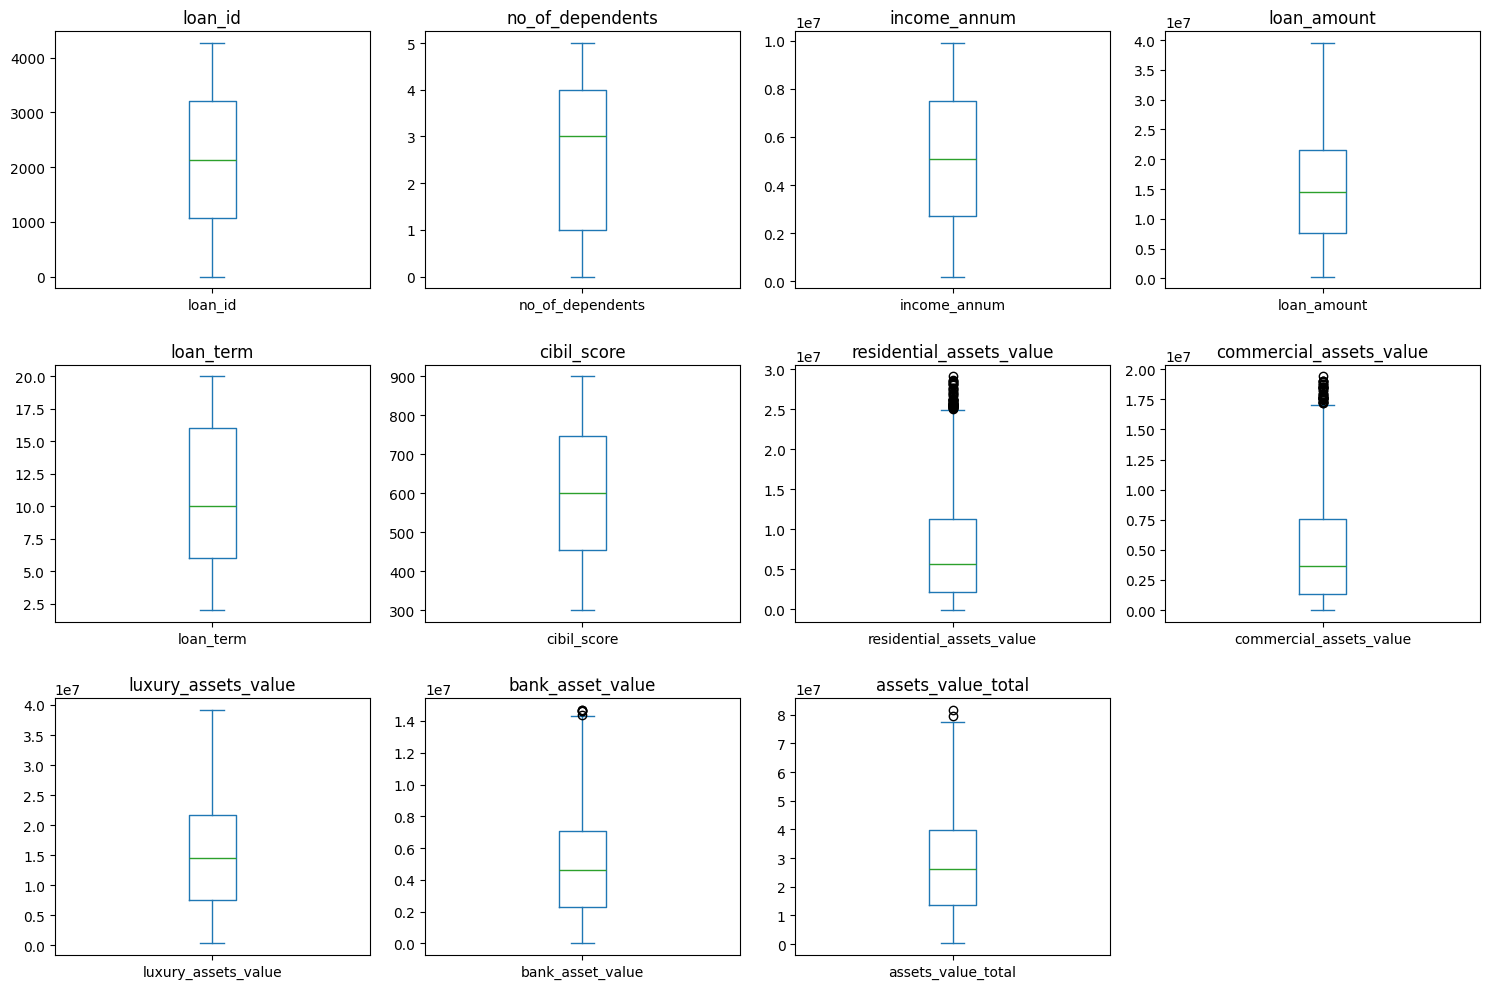

In [11]:
numerical_cols = df.select_dtypes(include=['int64']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1) 
    df[col].plot.box()
    plt.title(col)

plt.tight_layout()
plt.show()

### CAPPING OUTLIERS

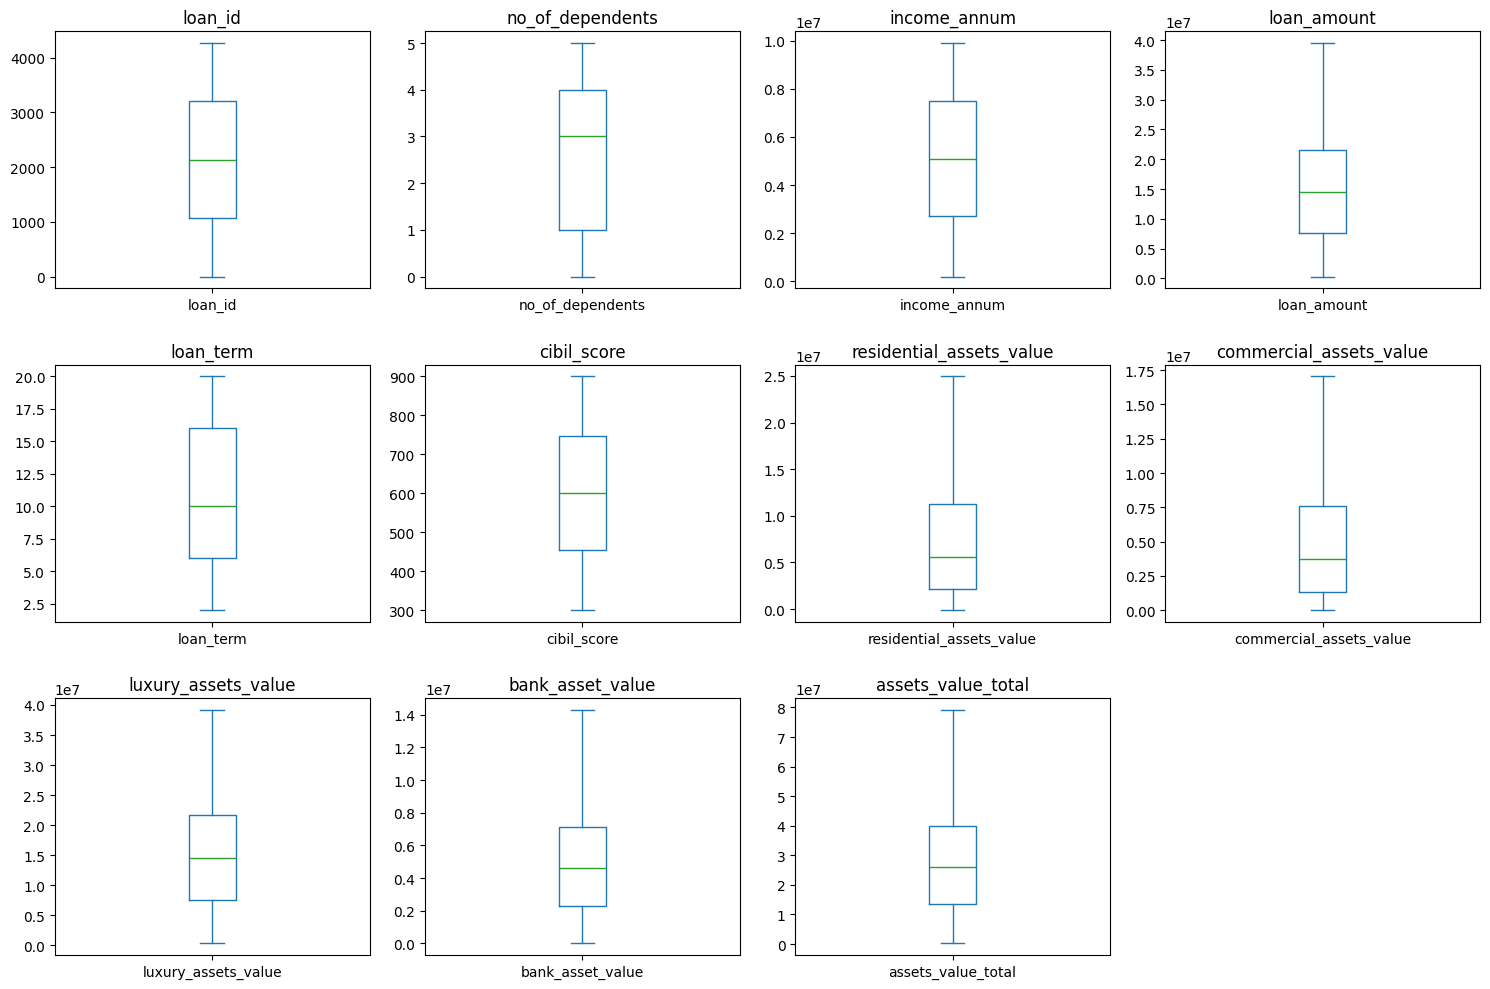

In [12]:
numerical_cols = df.select_dtypes(include=['int64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1) 
    df[col].plot.box()
    plt.title(col)

plt.tight_layout()
plt.show()

# DATA EXPLORATION

## DISPLAYING THE DATASET AFTER DATA CLEANING

In [13]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,income_bin,loan_amount,loan_term,cibil_score,cibil_bin,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,assets_value_total,loan_status
0,1.0,2.0,Graduate,No,9600000.0,High Income,29900000.0,12.0,778.0,Excellent,2400000.0,17050000.0,22700000.0,8000000.0,42700000.0,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,Middle Income,12200000.0,8.0,417.0,Poor,2700000.0,2200000.0,8800000.0,3300000.0,13700000.0,Rejected
2,3.0,3.0,Graduate,No,9100000.0,High Income,29700000.0,20.0,506.0,Fair,7100000.0,4500000.0,33300000.0,12800000.0,44900000.0,Rejected
3,4.0,3.0,Graduate,No,8200000.0,High Income,30700000.0,8.0,467.0,Fair,18200000.0,3300000.0,23300000.0,7900000.0,44800000.0,Rejected
4,5.0,5.0,Not Graduate,Yes,9800000.0,High Income,24200000.0,20.0,382.0,Poor,12400000.0,8200000.0,29400000.0,5000000.0,50000000.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5.0,Graduate,Yes,1000000.0,Lower Middle Income,2300000.0,12.0,317.0,Poor,2800000.0,500000.0,3300000.0,800000.0,6600000.0,Rejected
4265,4266.0,0.0,Not Graduate,Yes,3300000.0,Middle Income,11300000.0,20.0,559.0,Fair,4200000.0,2900000.0,11000000.0,1900000.0,18100000.0,Approved
4266,4267.0,2.0,Not Graduate,No,6500000.0,Upper Middle Income,23900000.0,18.0,457.0,Fair,1200000.0,12400000.0,18100000.0,7300000.0,31700000.0,Rejected
4267,4268.0,1.0,Not Graduate,No,4100000.0,Middle Income,12800000.0,8.0,780.0,Excellent,8200000.0,700000.0,14100000.0,5800000.0,23000000.0,Approved


In [14]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,income_bin,loan_amount,loan_term,cibil_score,cibil_bin,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,assets_value_total,loan_status
0,1.0,2.0,Graduate,No,9600000.0,High Income,29900000.0,12.0,778.0,Excellent,2400000.0,17050000.0,22700000.0,8000000.0,42700000.0,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,Middle Income,12200000.0,8.0,417.0,Poor,2700000.0,2200000.0,8800000.0,3300000.0,13700000.0,Rejected
2,3.0,3.0,Graduate,No,9100000.0,High Income,29700000.0,20.0,506.0,Fair,7100000.0,4500000.0,33300000.0,12800000.0,44900000.0,Rejected
3,4.0,3.0,Graduate,No,8200000.0,High Income,30700000.0,8.0,467.0,Fair,18200000.0,3300000.0,23300000.0,7900000.0,44800000.0,Rejected
4,5.0,5.0,Not Graduate,Yes,9800000.0,High Income,24200000.0,20.0,382.0,Poor,12400000.0,8200000.0,29400000.0,5000000.0,50000000.0,Rejected


In [15]:
df.tail(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,income_bin,loan_amount,loan_term,cibil_score,cibil_bin,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,assets_value_total,loan_status
4264,4265.0,5.0,Graduate,Yes,1000000.0,Lower Middle Income,2300000.0,12.0,317.0,Poor,2800000.0,500000.0,3300000.0,800000.0,6600000.0,Rejected
4265,4266.0,0.0,Not Graduate,Yes,3300000.0,Middle Income,11300000.0,20.0,559.0,Fair,4200000.0,2900000.0,11000000.0,1900000.0,18100000.0,Approved
4266,4267.0,2.0,Not Graduate,No,6500000.0,Upper Middle Income,23900000.0,18.0,457.0,Fair,1200000.0,12400000.0,18100000.0,7300000.0,31700000.0,Rejected
4267,4268.0,1.0,Not Graduate,No,4100000.0,Middle Income,12800000.0,8.0,780.0,Excellent,8200000.0,700000.0,14100000.0,5800000.0,23000000.0,Approved
4268,4269.0,1.0,Graduate,No,9200000.0,High Income,29700000.0,10.0,607.0,Good,17800000.0,11800000.0,35700000.0,12000000.0,65300000.0,Approved


## SHAPE OF THE DATASET

In [16]:
df.shape

(4269, 16)

## STRUCTURE OF THE DATASET

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_id                   4269 non-null   float64 
 1   no_of_dependents          4269 non-null   float64 
 2   education                 4269 non-null   category
 3   self_employed             4269 non-null   category
 4   income_annum              4269 non-null   float64 
 5   income_bin                4269 non-null   category
 6   loan_amount               4269 non-null   float64 
 7   loan_term                 4269 non-null   float64 
 8   cibil_score               4269 non-null   float64 
 9   cibil_bin                 4269 non-null   category
 10  residential_assets_value  4269 non-null   float64 
 11  commercial_assets_value   4269 non-null   float64 
 12  luxury_assets_value       4269 non-null   float64 
 13  bank_asset_value          4269 non-null   float6

In [18]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'income_bin', 'loan_amount', 'loan_term', 'cibil_score',
       'cibil_bin', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'assets_value_total',
       'loan_status'],
      dtype='object')

In [19]:
df.dtypes

loan_id                      float64
no_of_dependents             float64
education                   category
self_employed               category
income_annum                 float64
income_bin                  category
loan_amount                  float64
loan_term                    float64
cibil_score                  float64
cibil_bin                   category
residential_assets_value     float64
commercial_assets_value      float64
luxury_assets_value          float64
bank_asset_value             float64
assets_value_total           float64
loan_status                 category
dtype: object

## UNIQUE VALUES IN COLUMNS

### NUMBER OF DEPENDENTS

In [20]:
print(df['no_of_dependents'].unique())
print("\n TOTAL NO OF UNIQUE VALUES:", df['no_of_dependents'].nunique())

[2. 0. 3. 5. 4. 1.]

 TOTAL NO OF UNIQUE VALUES: 6


### EDUCATION

In [21]:
print(df['education'].unique())
print("\n TOTAL NO OF UNIQUE VALUES:", df['education'].nunique())

[' Graduate', ' Not Graduate']
Categories (2, object): [' Graduate', ' Not Graduate']

 TOTAL NO OF UNIQUE VALUES: 2


### SELF EMPLOYED

In [22]:
print(df['self_employed'].unique())
print("\n TOTAL NO OF UNIQUE VALUES:", df['self_employed'].nunique())

[' No', ' Yes']
Categories (2, object): [' No', ' Yes']

 TOTAL NO OF UNIQUE VALUES: 2


### INCOME BIN

In [23]:
print(df['income_bin'].unique())
print("\n TOTAL NO OF UNIQUE VALUES:", df['income_bin'].nunique())

['High Income', 'Middle Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']
Categories (5, object): ['Low Income' < 'Lower Middle Income' < 'Middle Income' < 'Upper Middle Income' < 'High Income']

 TOTAL NO OF UNIQUE VALUES: 5


### LOAN TERM

In [24]:
print(df['loan_term'].unique())
print("\n TOTAL NO OF UNIQUE VALUES:", df['loan_term'].nunique())

[12.  8. 20. 10.  4.  2. 18. 16. 14.  6.]

 TOTAL NO OF UNIQUE VALUES: 10


### CIBIL BIN

In [25]:
print(df['cibil_bin'].unique())
print("\n TOTAL NO OF UNIQUE VALUES:", df['cibil_bin'].nunique())

['Excellent', 'Poor', 'Fair', 'Good']
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

 TOTAL NO OF UNIQUE VALUES: 4


### LOAN STATUS

In [26]:
print(df['loan_status'].unique())
print("\n TOTAL NO OF UNIQUE VALUES:", df['loan_status'].nunique())

[' Approved', ' Rejected']
Categories (2, object): [' Approved', ' Rejected']

 TOTAL NO OF UNIQUE VALUES: 2


## SUMMARY STATISTICS OF NUMERICAL COLUMNS

In [27]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,assets_value_total
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.454861e+06,4.964289e+06,1.512631e+07,4.976341e+06,2.757140e+07
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.452442e+06,4.363080e+06,9.103754e+06,3.249159e+06,1.688964e+07
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,2.000000e+05
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,1.370000e+07
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,2.620000e+07
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,3.990000e+07
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.495000e+07,1.705000e+07,3.920000e+07,1.430000e+07,7.920000e+07


In [28]:
df.describe(include=['category'])

,education,self_employed,income_bin,cibil_bin,loan_status
count,4269,4269,4269,4269,4269
unique,2,2,5,4,2
top,Graduate,Yes,Lower Middle Income,Fair,Approved
freq,2144,2150,1070,1076,2656


## CATEGORICAL VALUES COUNT

### NUMBER OF DEPENDENTS

In [29]:
df['no_of_dependents'].value_counts()

no_of_dependents
4.0    752
3.0    727
0.0    712
2.0    708
1.0    697
5.0    673
Name: count, dtype: int64

### EDUCATION

In [30]:
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

### EMPLOYMENT

In [31]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

### LOAN TERM

In [32]:
df['loan_term'].value_counts()

loan_term
6.0     490
12.0    456
4.0     447
10.0    436
18.0    422
16.0    412
20.0    411
14.0    405
2.0     404
8.0     386
Name: count, dtype: int64

### LOAN STATUS

In [33]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

# DATA VISUALIZATION

## HISTOGRAM DEPICTING NUMERICAL COLUMNS

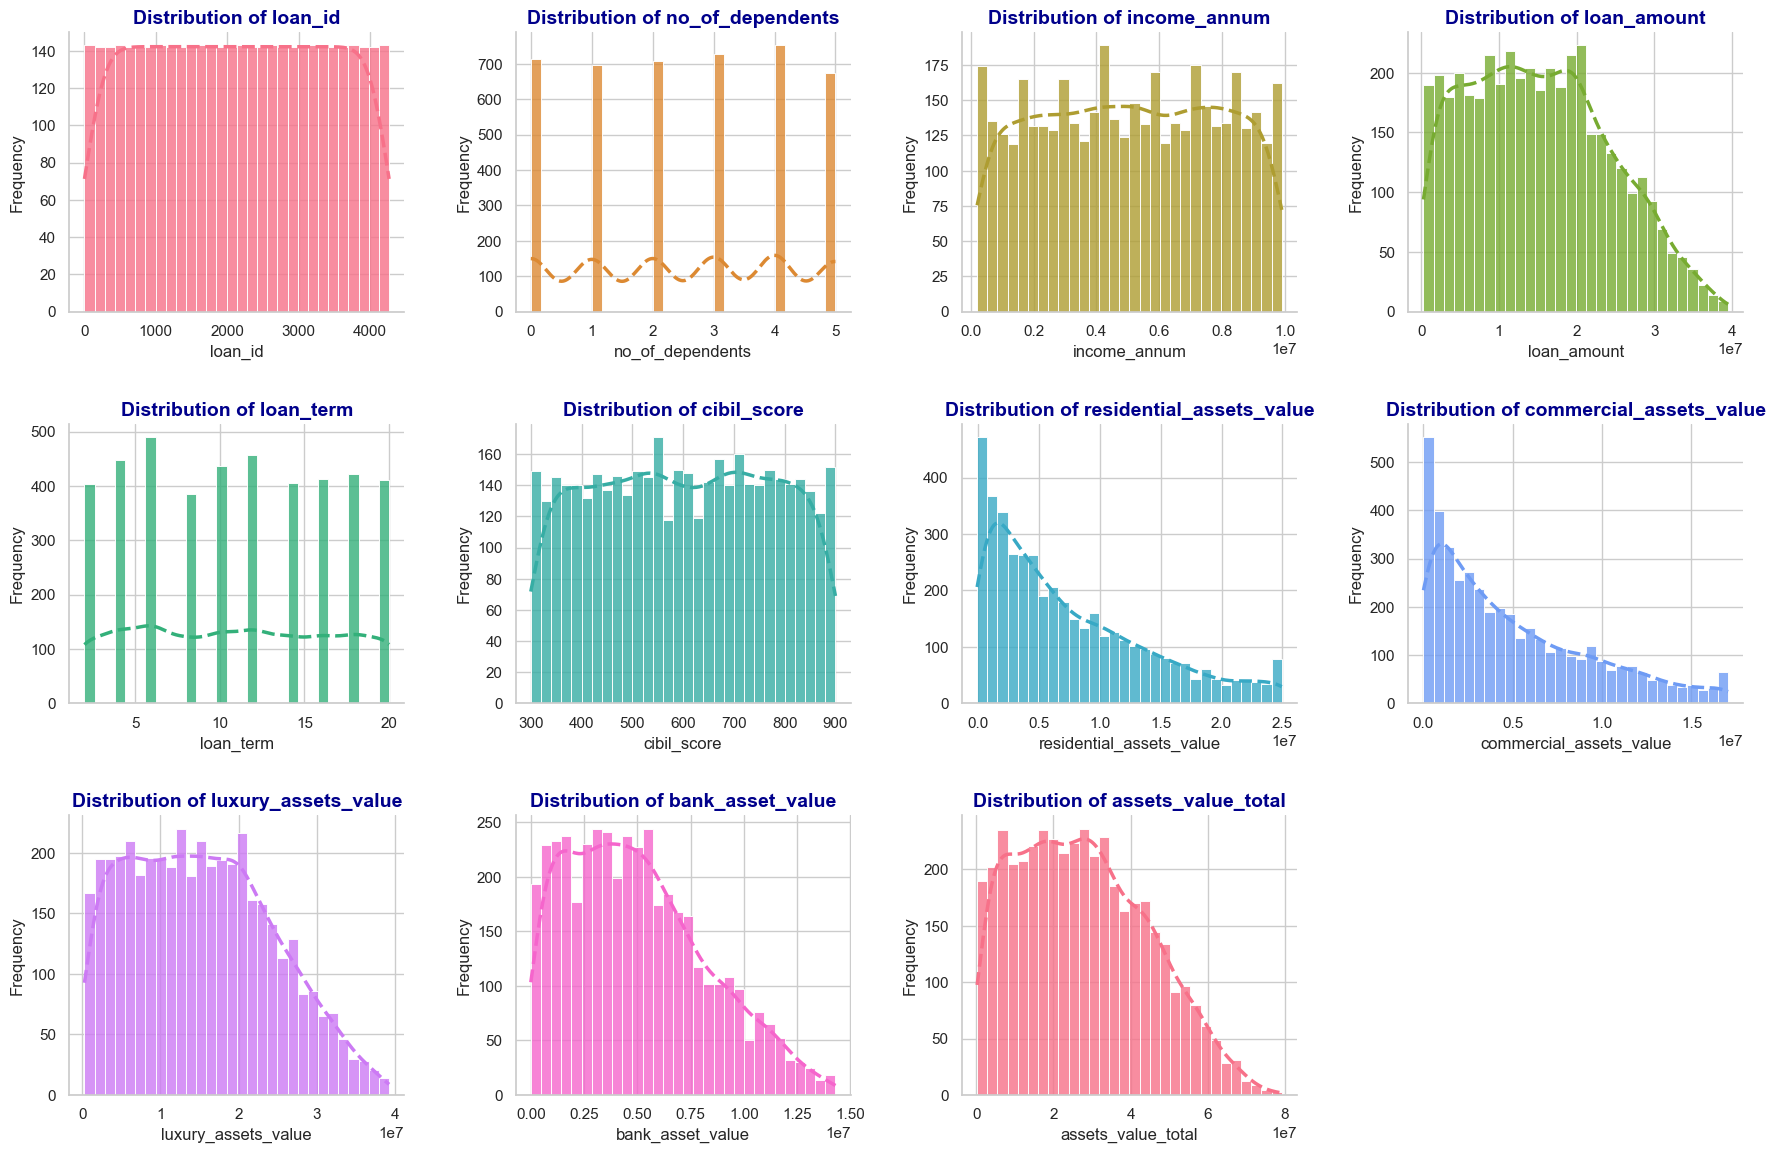

In [34]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    
    sns.histplot(df[col], kde=True, bins=30, color=sns.color_palette("husl", 10)[i % 10], 
                 line_kws={'linewidth': 2.5, 'linestyle': '--'}, alpha=0.8)
    
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    sns.despine()

plt.tight_layout(pad=2.0, w_pad=2.5, h_pad=2.5)

plt.show()

## COUNT PLOT DEPICTING CATEGORICAL COLUMNS

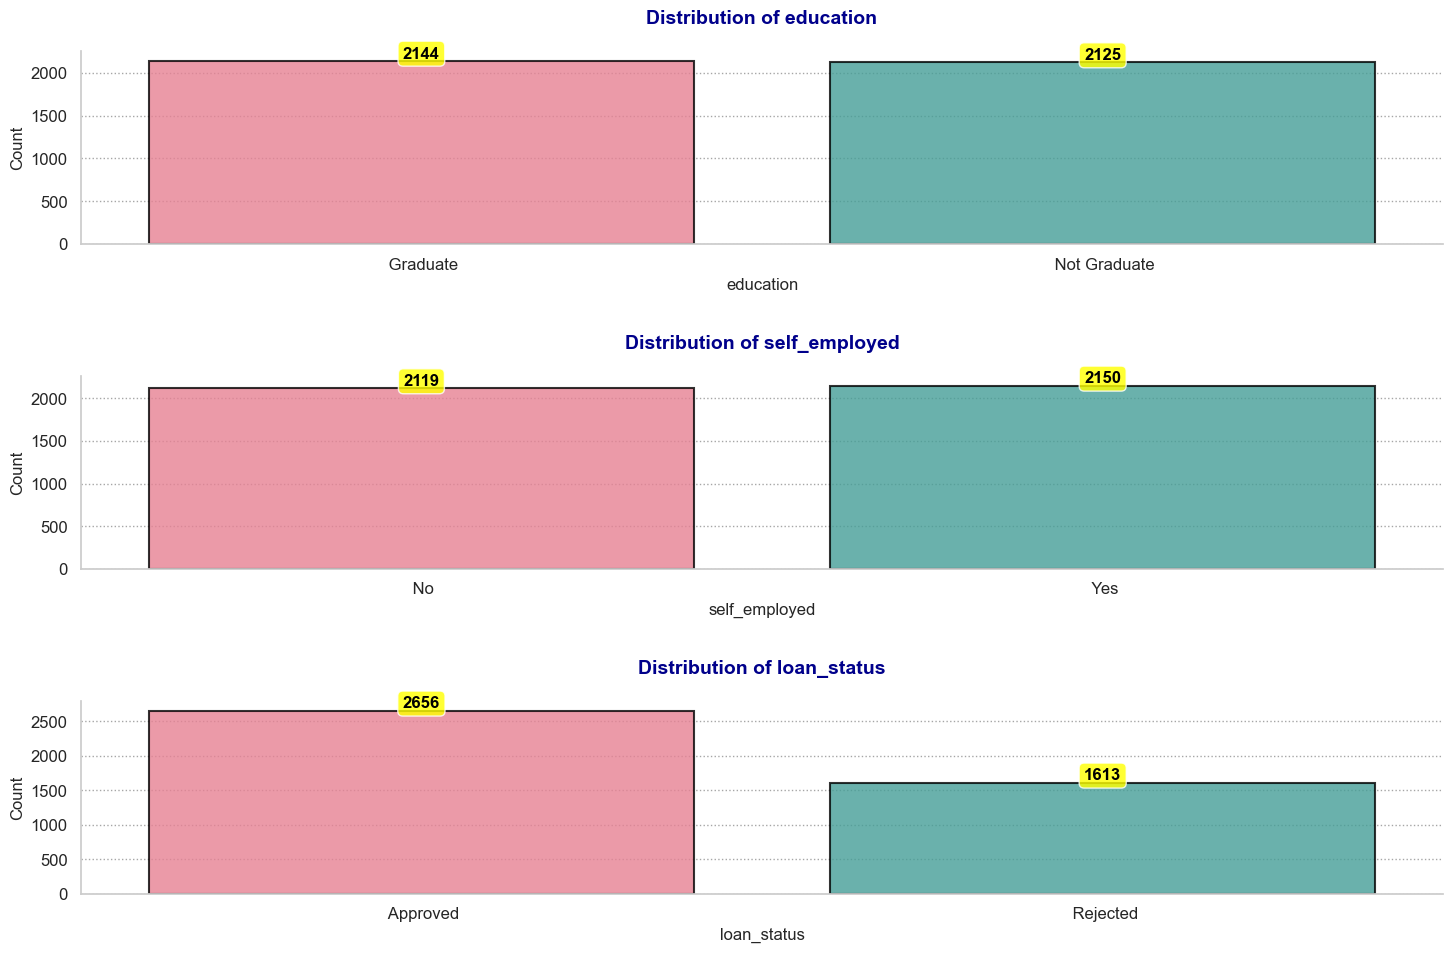

In [35]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, col in enumerate(['education', 'self_employed', 'loan_status']):
    plt.subplot(3, 1, i + 1)

    bar_plot = sns.countplot(
        x=df[col], 
        hue=df[col],  
        palette='husl', 
        edgecolor='black', 
        linewidth=1.5, 
        alpha=0.8,
        legend=False  
    )
    
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='darkblue', pad=20)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(axis='y', linestyle=':', color='gray', alpha=0.7)

    for p in bar_plot.patches:
        bar_plot.annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points', 
                          fontsize=12, color='black', weight='bold', 
                          bbox=dict(facecolor='yellow', alpha=0.8, boxstyle='round,pad=0.3'))

    sns.despine()

plt.tight_layout(pad=2.0, w_pad=2.5, h_pad=2.5)

plt.show()

## CORRELATION HEATMAP ANALYZING NUMERICAL COLUMNS

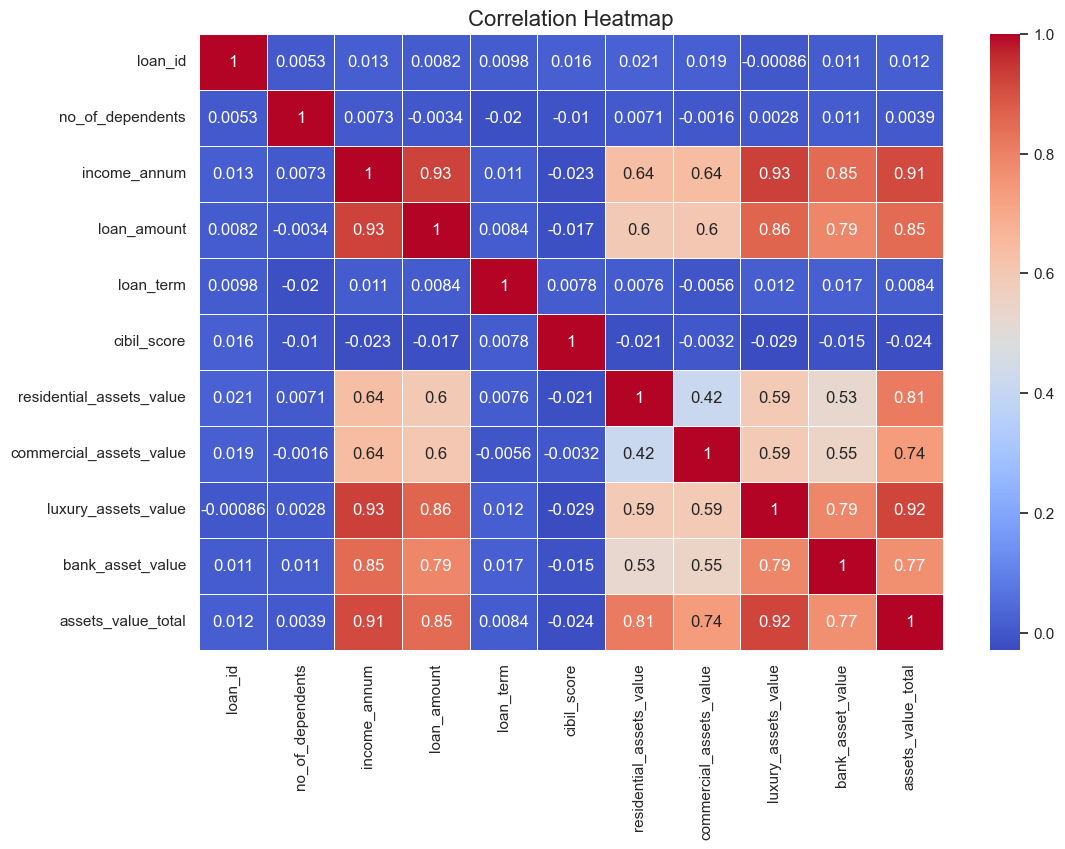

In [36]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## COUNT PLOT DEPICTING THE RELATION BETWEEN THE NUMBER OF DEPENDENTS AND LOAN STATUS

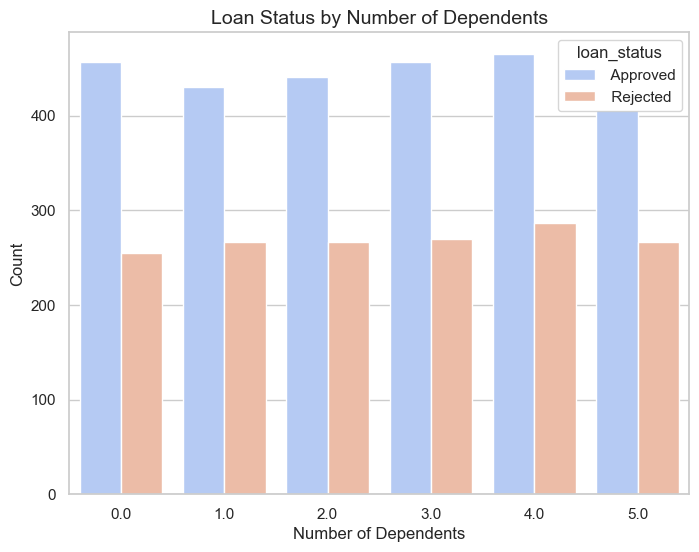

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='no_of_dependents', hue='loan_status', palette='coolwarm')
plt.title('Loan Status by Number of Dependents', fontsize=14)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

## COUNT PLOT DEPICTING THE RELATION BETWEEN EDUCATION LEVEL AND LOAN STATUS

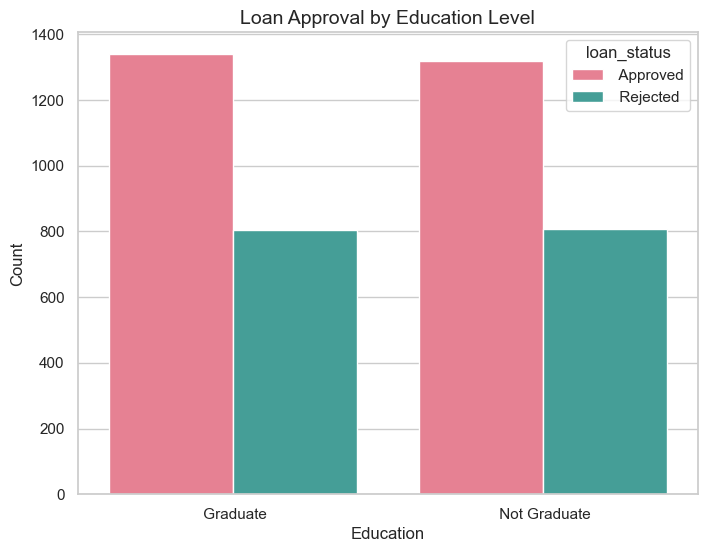

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education', hue='loan_status', palette='husl')
plt.title('Loan Approval by Education Level', fontsize=14)
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

## COUNT PLOT DEPICTING THE RELATION BETWEEN EMPLOYMENT STATUS AND LOAN STATUS

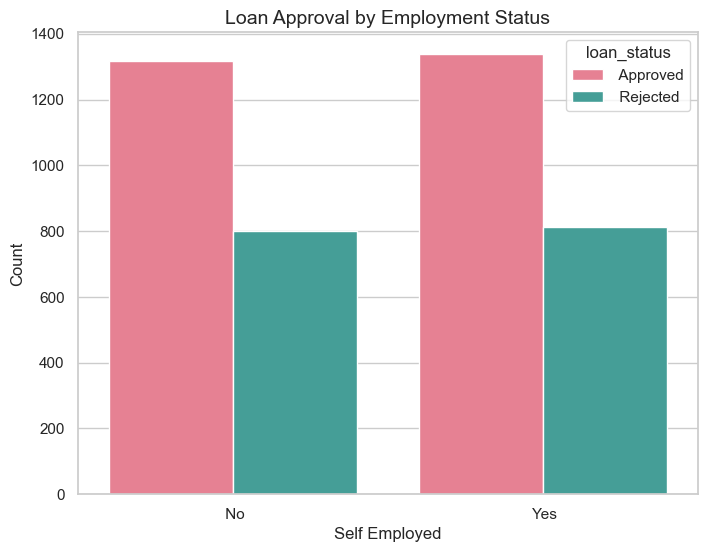

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='self_employed', hue='loan_status', palette='husl')
plt.title('Loan Approval by Employment Status', fontsize=14)
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

## COUNT PLOT DEPICTING THE RELATION BETWEEN ANNUAL INCOME AND LOAN STATUS

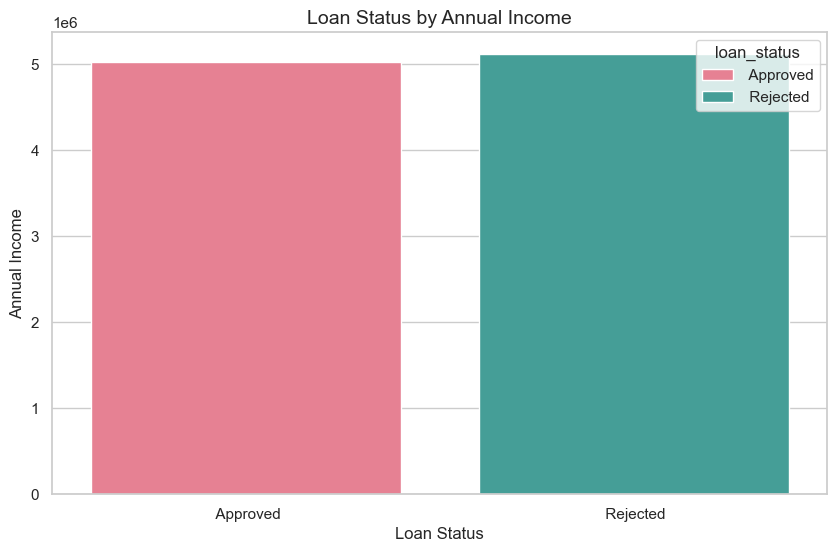

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='loan_status', y='income_annum', hue='loan_status', palette='husl', errorbar=None, legend=True)
plt.title('Loan Status by Annual Income', fontsize=14)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

## COUNT PLOT DEPICTING THE RELATION BETWEEN LOAN AMOUNT AND LOAN STATUS

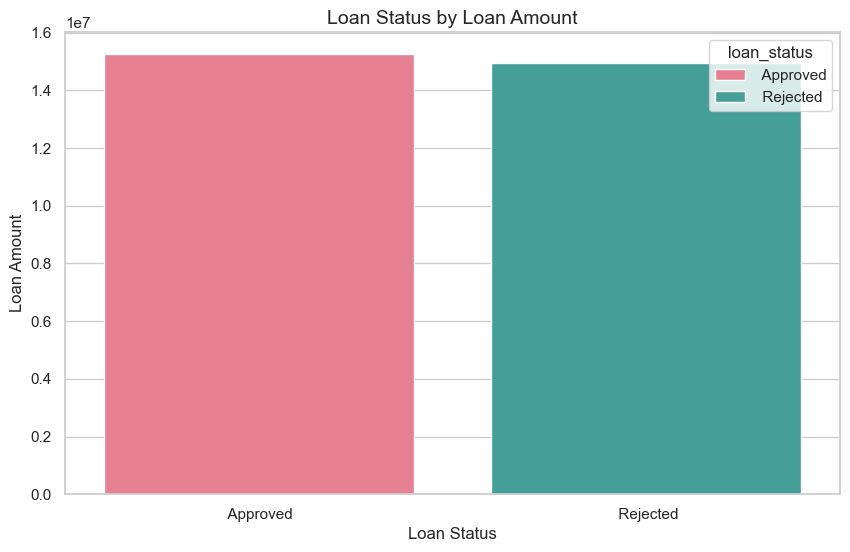

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='loan_status', y='loan_amount', hue='loan_status', palette='husl', errorbar=None, legend=True)
plt.title('Loan Status by Loan Amount', fontsize=14)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

## COUNT PLOT DEPICTING THE RELATION BETWEEN LOAN TERM AND LOAN STATUS

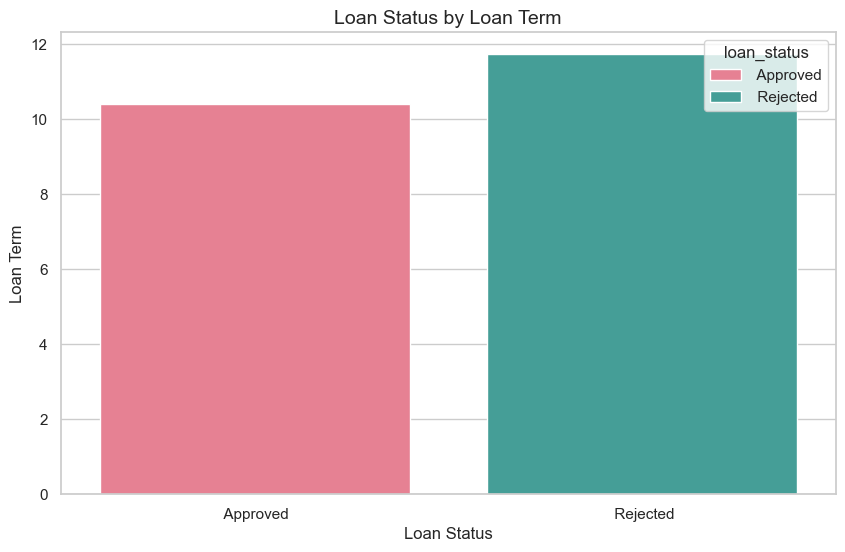

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='loan_status', y='loan_term', hue='loan_status', palette='husl', errorbar=None, legend=True)
plt.title('Loan Status by Loan Term', fontsize=14)
plt.xlabel('Loan Status')
plt.ylabel('Loan Term')
plt.show()

## HISTOGRAM DEPICTING THE RELATION BETWEEN CIBIL SCORE AND LOAN STATUS

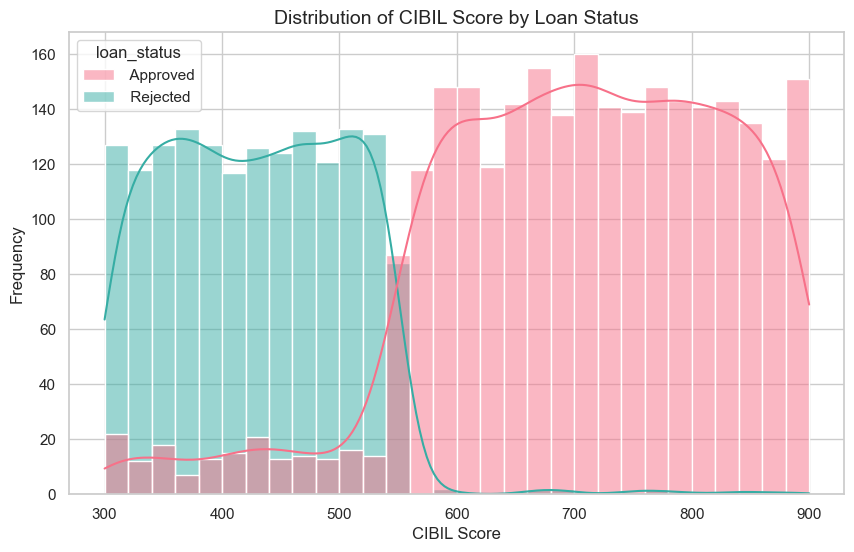

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cibil_score', hue='loan_status', kde=True, bins=30, palette='husl')
plt.title('Distribution of CIBIL Score by Loan Status', fontsize=14)
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.show()

## CATEGORY PLOT DEPICTING THE RELATION BETWEEN ASSET VALUES AND LOAN STATUS

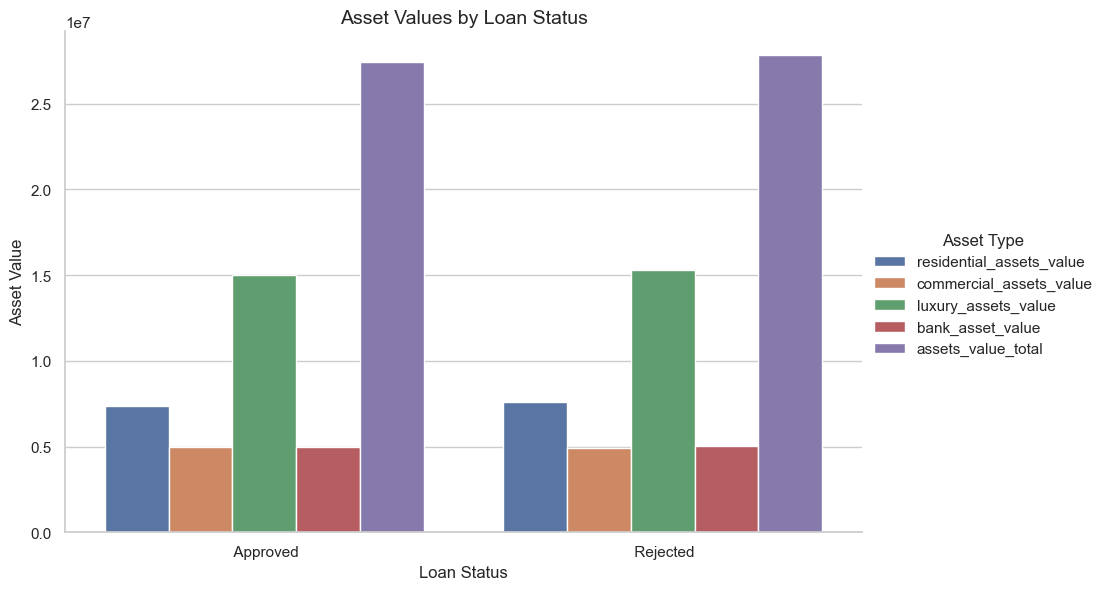

In [44]:
df_melted = df.melt(id_vars=['loan_status'], 
                    value_vars=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'assets_value_total'],
                    var_name='Asset Type', 
                    value_name='Asset Value')

sns.catplot(x='loan_status', y='Asset Value', hue='Asset Type', data=df_melted, kind='bar', height=6, aspect=1.5, errorbar=None)
plt.title('Asset Values by Loan Status', fontsize=14)
plt.xlabel('Loan Status')
plt.ylabel('Asset Value')
plt.show()

## SCATTER PLOT DEPICTING THE RELATION BETWEEN ANNUAL INCOME, LOAN AMOUNT AND LOAN STATUS

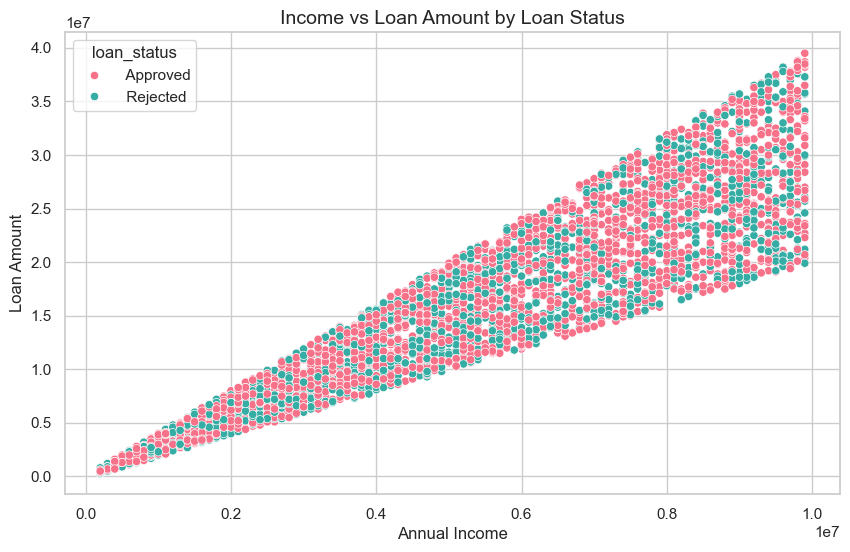

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status', data=df, palette='husl')
plt.title('Income vs Loan Amount by Loan Status', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

## COUNT PLOT DEPICTING THE RELATION BETWEEN LOAN TERM AND LOAN STATUS

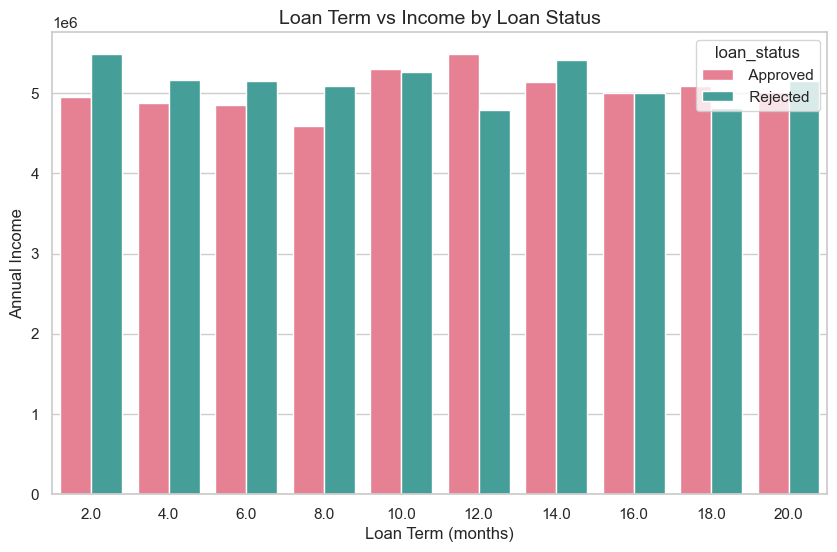

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='loan_term', y='income_annum', hue='loan_status', palette='husl', errorbar=None, legend=True)
plt.title('Loan Term vs Income by Loan Status', fontsize=14)
plt.xlabel('Loan Term (months)')
plt.ylabel('Annual Income')
plt.show()

## CORRELATION HEATMAP OF LOAN APPROVAL RATE BASED ON INCOME AND CIBIL SCORE CATEGORIES

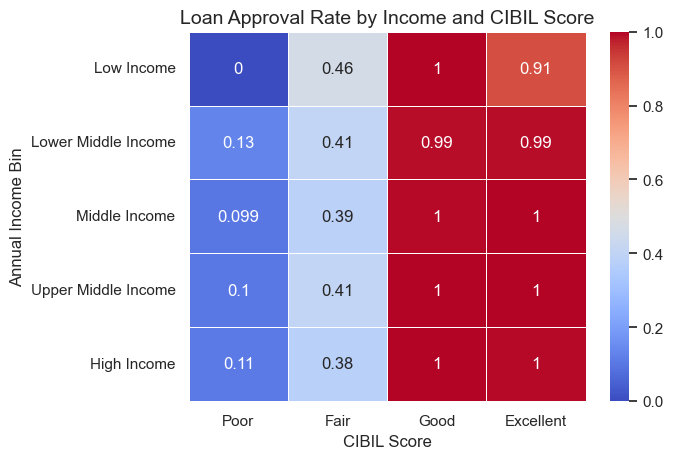

In [47]:
pivot_table = pd.crosstab(df['income_bin'], df['cibil_bin'], 
                          values=df['loan_status'], 
                          aggfunc=lambda x: (x == ' Approved').mean())
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Loan Approval Rate by Income and CIBIL Score', fontsize=14)
plt.xlabel('CIBIL Score')
plt.ylabel('Annual Income Bin')
plt.show()

## BAR PLOT DEPICTING LOAN STATUS BY EDUCATION LEVEL AND LOAN AMOUNT

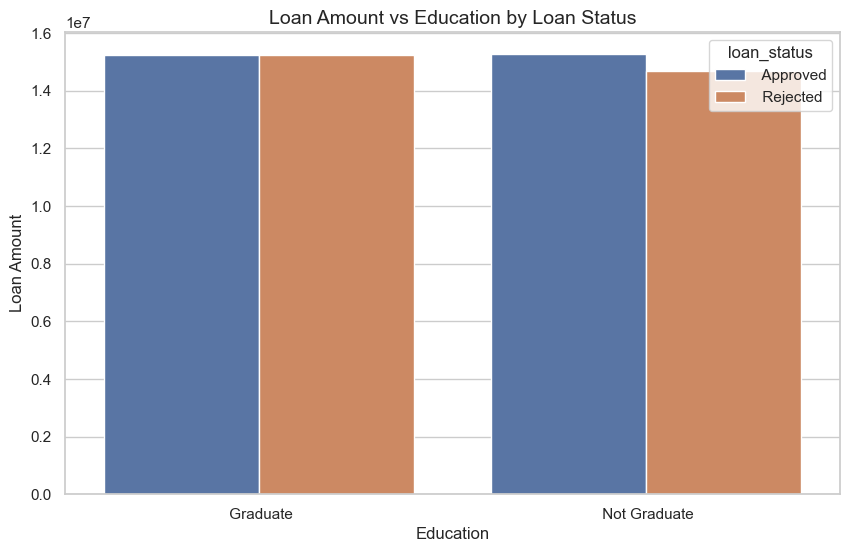

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='loan_amount', hue='loan_status', data=df, errorbar=None, legend=True)
plt.title('Loan Amount vs Education by Loan Status', fontsize=14)
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

## BAR PLOT DEPICTING LOAN STATUS BY EMPLOYMENT STATUS AND CIBIL SCORE

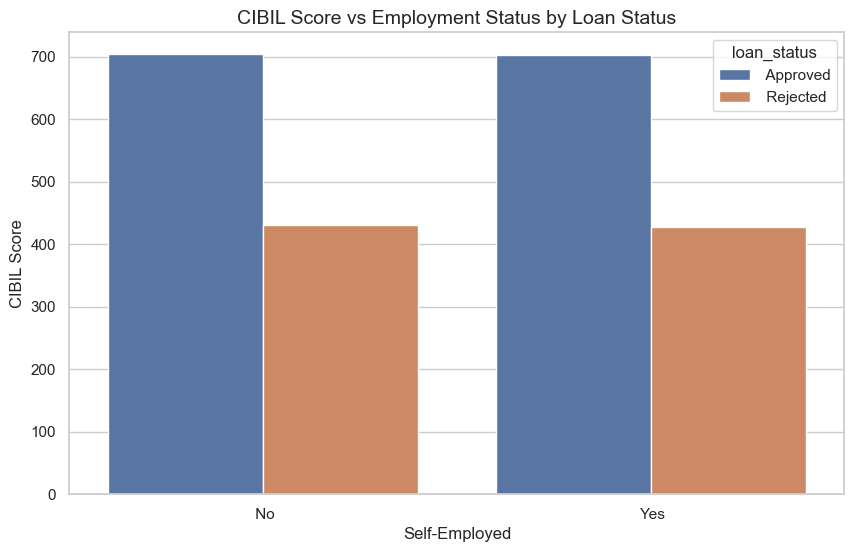

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='self_employed', y='cibil_score', hue='loan_status', data=df, errorbar=None, legend=True)
plt.title('CIBIL Score vs Employment Status by Loan Status', fontsize=14)
plt.xlabel('Self-Employed')
plt.ylabel('CIBIL Score')
plt.show()

## SCATTER PLOT DEPICTING LOAN STATUS BY ASSETS VALUE VS LOAN AMOUNT

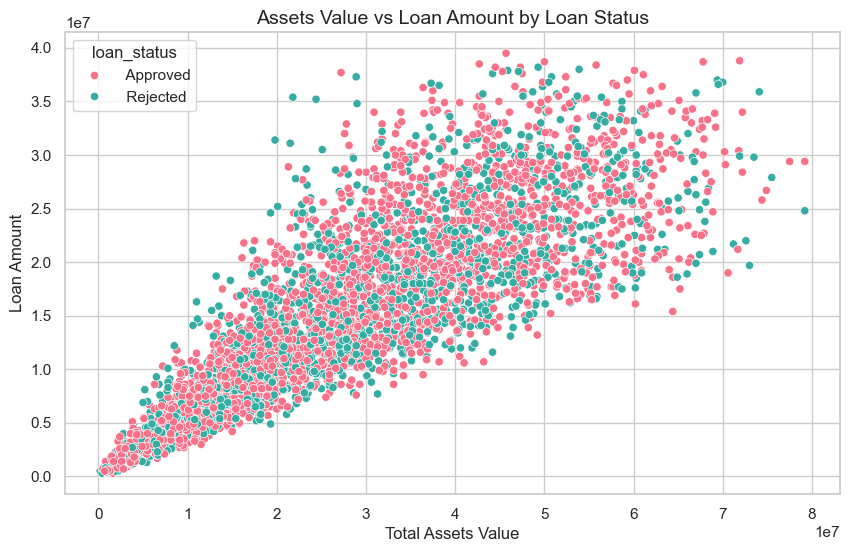

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='assets_value_total', y='loan_amount', hue='loan_status', data=df, palette='husl')
plt.title('Assets Value vs Loan Amount by Loan Status', fontsize=14)
plt.xlabel('Total Assets Value')
plt.ylabel('Loan Amount')
plt.show()

## SCATTER PLOT DEPICTING LOAN STATUS LOAN BY TERM VS LOAN AMOUNT

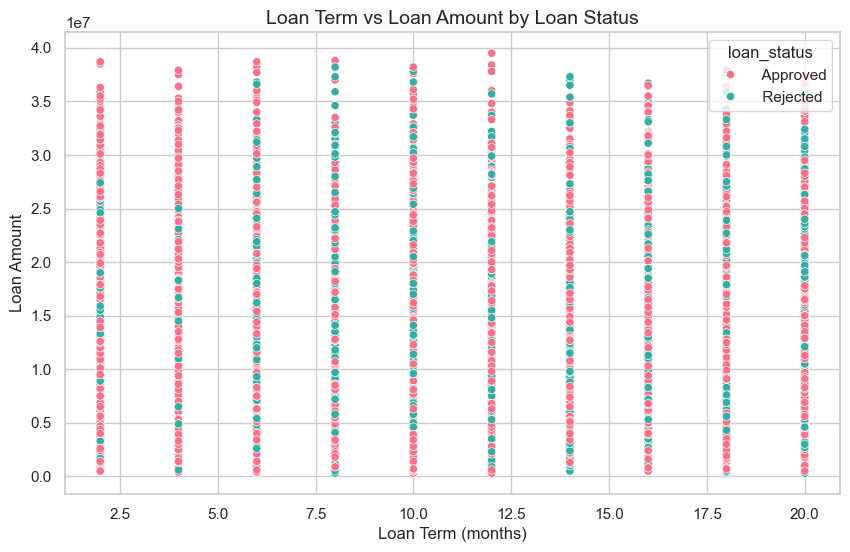

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_term', y='loan_amount', hue='loan_status', data=df, palette='husl')
plt.title('Loan Term vs Loan Amount by Loan Status', fontsize=14)
plt.xlabel('Loan Term (months)')
plt.ylabel('Loan Amount')
plt.show()

## BAR PLOT DEPICTING LOAN STATUS BASED ON EDUCATION LEVEL AND ANNUAL INCOME

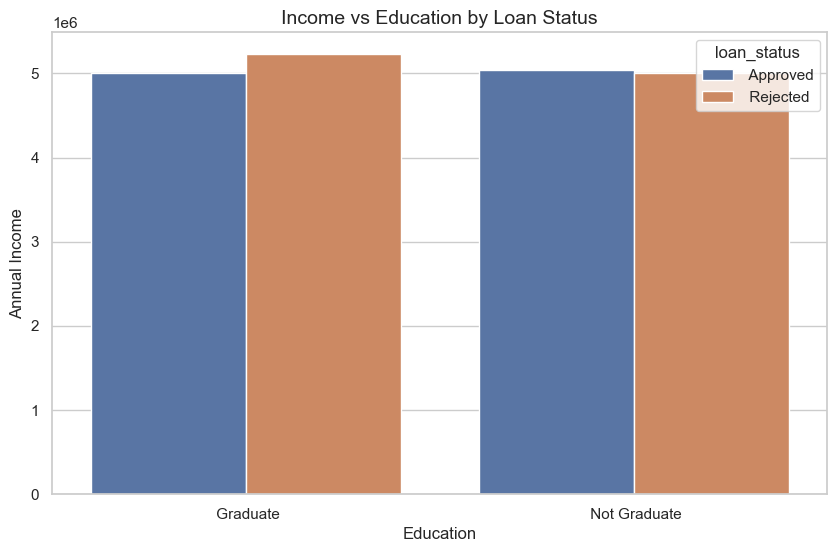

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='income_annum', hue='loan_status', data=df, errorbar=None, legend=True)
plt.title('Income vs Education by Loan Status', fontsize=14)
plt.xlabel('Education')
plt.ylabel('Annual Income')
plt.show()

## SCATTER PLOT DEPICTING LOAN STATUS BY CIBIL SCORE VS LOAN AMOUNT

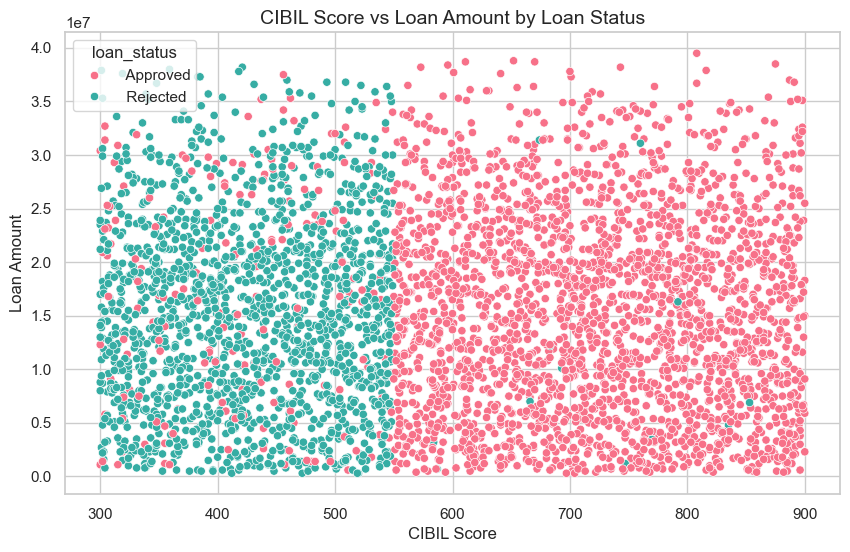

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cibil_score', y='loan_amount', hue='loan_status', data=df, palette='husl')
plt.title('CIBIL Score vs Loan Amount by Loan Status', fontsize=14)
plt.xlabel('CIBIL Score')
plt.ylabel('Loan Amount')
plt.show()

## CORRELATION HEATMAP SHOWING LOAN APPROVAL RATE BY EDUCATION LEVEL

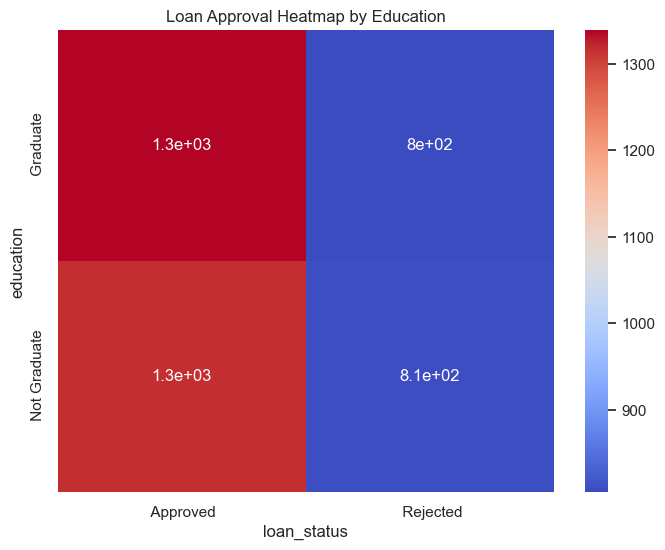

In [54]:
loan_approval_pivot = df.pivot_table(values='loan_id', index='education', columns='loan_status', aggfunc='count', observed=False)

plt.figure(figsize=(8, 6))
sns.heatmap(loan_approval_pivot, annot=True, cmap='coolwarm')
plt.title('Loan Approval Heatmap by Education')
plt.show()

## LINE PLOT DEPICTING LOAN STATUS TRENDS BY LOAN AMOUNT AND LOAN TERM

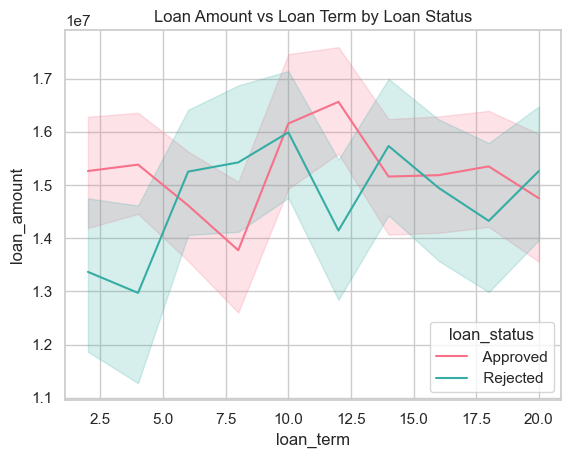

In [55]:
sns.lineplot(data=df, x='loan_term', y='loan_amount', hue='loan_status', palette='husl')
plt.title('Loan Amount vs Loan Term by Loan Status')
plt.show()

## PAIR PLOT DEPICTING RELATIONSHIPS BETWEEN INCOME, LOAN AMOUNT, CIBIL SCORE, AND TOTAL ASSETS BY LOAN STATUS

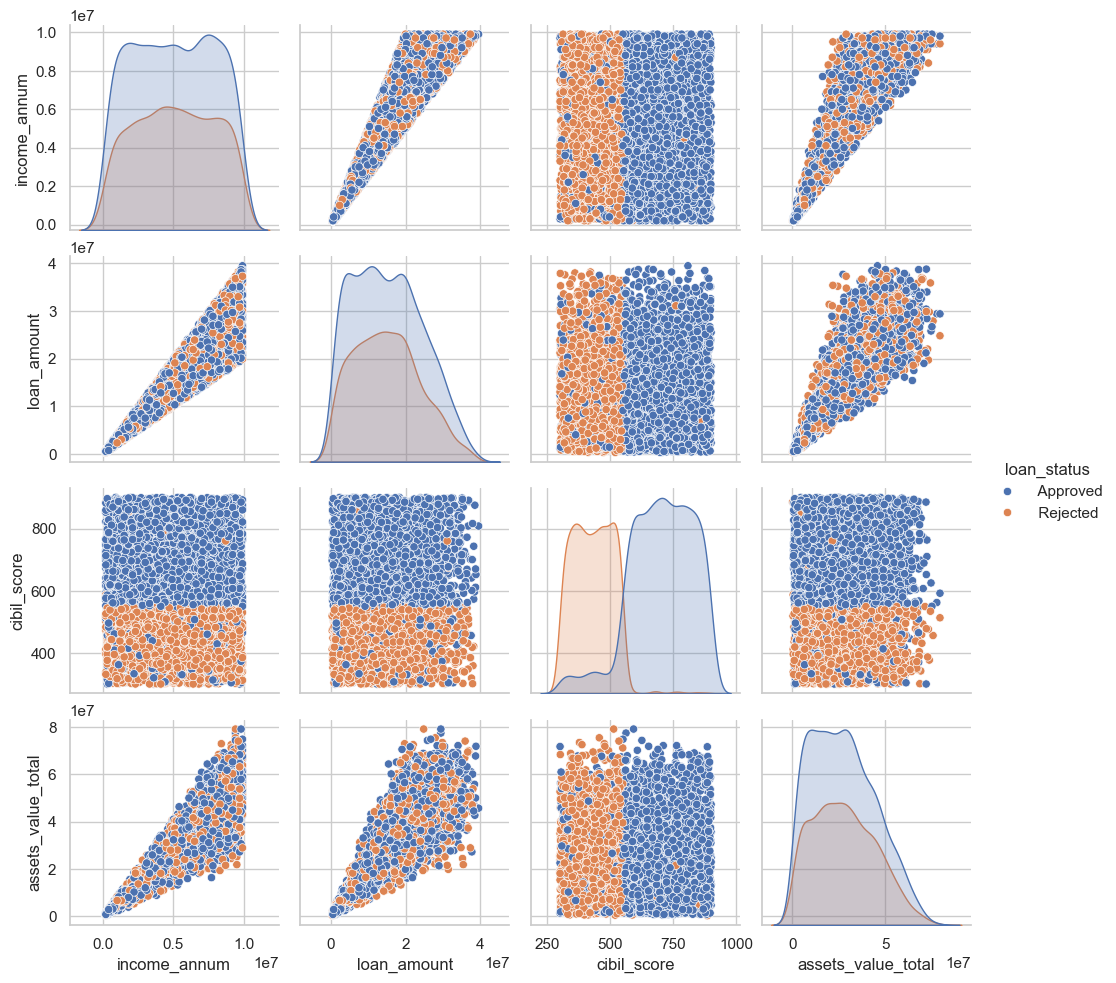

In [56]:
sns.pairplot(df[['income_annum', 'loan_amount', 'cibil_score', 'assets_value_total', 'loan_status']], hue='loan_status')
plt.show()